# Solving the Diasywolrd Model 

In these notebook I will solve original the Daisyworld model proposed by Lovelock and Waston (1984).

### Equations

Daisyworld is a model of a planet with only two types of living beings: white and black Daisies. The growth of this daisies is governed by the following equation:

\begin{equation}
\frac{d \alpha_i}{d t} = \alpha_i (x \beta - \gamma)
\end{equation}

Where $\alpha_i$ is the fraction of area of the planet covered by white ($\alpha_w$) or black ($\alpha_b$) daisies, $x$ is the fraction of area of fertile ground not covered by daisies, $\beta$ is the growth rate of daisies per unit of time, and $\gamma$ is the death rate. 

The are of free fertile ground is given by:

\begin{equation}
x = p - a_i
\end{equation}

where $p$ is the proportion of the planet that is fertile ground. The growth rate $\beta$ is given by a parabolic function that is zero out of the range between 5°C and 40°C, and reaches its maximum at 22.5°C

\begin{equation}
\beta = 1 - 0.003265(22.5 - T_i)
\end{equation} 

where T_i is the temperature of the daisies. The temperature of the planet Daisywolrd id given by the radiative equilibrium equation:

\begin{equation}
\sigma (T_e + 273)^4 = S L (1 -A)
\end{equation} 

Here, $\sigma$ is the Steffan-Botlzman constant, $S$ is a flux constant, L is an dimensionless number that measures the measures the luminosity of Daisyworld's sun.

$A = \sum \alpha_i A_i = \alpha_w A_w + \alpha_b A_b + \alpha_g A_g $ is the total albedo of the planet. This albedo is the sum of the albedos of the the daisies and the free ground multiplied for the fraction of area that they occupy. Note that $\alpha_g = 1 - \alpha_w  - \alpha_b$. It is interesting that Lovelock and Watson mention that this equation only holds for a flat or cylindrical planet. I suppose this is because a spherical surface has a larger area than a flat one. Thus,in a spherical surface the contribution for the total albedo would be larger.

Finally, the authors model the temperature of the daisies with the following equation:

\begin{equation}
(T_i + 273)^4 = q(A -A_i) + (T_e + 273)^4
\end{equation} 

The authors provide the following justification for this equation. First, this equation makes sure that the temperature of the black daisies is greater than the temperature of the ground, which in turn, is grater that the temperature of the white daisies. This petter in expected because of the color of the daisies. Second, this equation makes sure that the total radiation lost to space is equal to the radiation lost to space in each area of daisies and ground. In other words, this equation makes sure that energy is conserved.

To see this, let's start with the sum of the lost radiation in each area: $F = \sum \alpha_i \sigma (T + 273)$. We can now use equation 5 to obtain $\sigma q A \sum \alpha_i - \sigma q A_i \sum \alpha_i + \sum \alpha_i \sigma (T_e + 273)^4$. Now, since the sum of all the albedos is equals to one ($\sum \alpha_i = 1$), and $A = \sum \alpha_i A_i$, the first two terms cancel out and we get: $F = \sigma (T_e + 273)^4 $, which is the energy lost to space from Daisyworld. 



### Solving the equations

We can solve this equations using numerical methods. We can user the Euler method, or the Runge-Kutta methods. Here we will implement this methods in python.

#### Euler method

The Euler method consist in making linear approximations to solve an ordinary differential equation of the form $\frac{dx}{dt} = f(x, t)$.  WE start at an initial point. We know that at this point the function f(x,y) gives us the slope of a line tangent to the solution curve. Thus, we can take a small step in this direction, and then recalculate the slope at some other point. In this way, we can approximate the solution by taking small temps in the direction of the lines given by the derivative. This is represented by the equation:

\begin{equation*}
x_{n+1} = x_{n} + f(x,t) * h
\end{equation*} 

Where $h = t_{n+1}-t_{n}$ is the size of the step. Let's implement this in python.

In [26]:
def euler_method_next(x0, t0, f, h):
    '''
    This function uses the eluer method to solve an ordinary differential equation.
    INPUT:
        x0(float): x initial condition
        t0(float): t initial condition
        f (function): function defining the derivative dx/dt = f
        h (float): step
    OUTPUT:
        y (numpy array): value of y at next step
    '''
    return x0 + f(x0, t0) * h

####  Runge-Kutta methods

The Runge-Kutta methods also allow us to solve ordinary differential equations. In particular the method of fourth order, known as 'RK4', introduces a series of corrections to the Euler methods, allowing us to make more precise approximations. This method consists in correcting the euler's method with the following terms:

\begin{equation*}
x_{n+1} = x_n + \frac{k1}{6} + \frac{k2}{3} + \frac{k3}{3} + \frac{k4}{2}
\end{equation*}

Where, $k_1 = h  f(x_n, t_n)$, $k_2 = h f(x_n + \frac{h}{2}, t_n + \frac{k_1}{2})$, $k_3 = h f (x_n + \frac{h}{2}, t_n + \frac{k2}{2})$, and $k_4 = h f(x_n + h, t_n + k_3)$.

In [27]:
def RK4_next(x0, t0, f, h):
    '''
    This function uses the RK4 method to solve an ordinary differential equation.
    INPUT:
        x0(float): x initial condition
        t0(float): t initial condition
        f (function): function defining the derivative dx/dt = f
        h (float): step
    OUTPUT:
        y (numpy array): value of y at next step
    '''
    k1 = h * f(x0, t0) 
    k2 = h * f(x0 + 0.5 * h, t0 + 0.5 * k1) 
    k3 = h * f(x0 + 0.5 * h, t0 + 0.5 * k2) 
    k4 = h * f(x0 + h, t0 + k3) 
    return x0 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 


Now we can solve the model. We are interested in the effect of the increase of solar luminosity in the life of Daisyworld and in the local and global temperatures.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class Original_Daisyworld():
    q = 20 # Heat Transfer Coefficien
    sigma = 5.6704e-5  #Stefan-Boltzman Constant
    S = 9.17e+5  # Solar constant
    L = 0.5 # Solar luminosity constant
    
    def __init__(self
                ,death_rate =.3 #death rate of daysies
                ,albedo_w=0.75  #white daysies albedo
                ,albedo_g=0.5  #Free ground albedo      
                ,albedo_b=0.25  #Black daysies albedo
                ,area_w= 0.3 # Fraction area of white daisies
                ,area_b= 0.3 # Fraction area of black daisies
                ):
        'Initilize all the constants and variables'
        self.death_rate = death_rate
        self.albedo_w = albedo_w
        self.albedo_g = albedo_g
        self.albedo_b = albedo_b
        self.area_w = area_w
        self.area_b = area_b
        self.area_g = 1 - self.area_b - self.area_w 
        self.albedo_total = self.area_w * self.albedo_w + self.area_b * self.albedo_b + self.area_g * self.albedo_g
        self.Te = ((self.S * self.L * (1- self.albedo_total) / self.sigma) ** 0.25)- 273
        self.Tw = self.q*(self.albedo_total-self.albedo_w)+ self.Te 
        self.Tb = self.q*(self.albedo_total-self.albedo_b)+ self.Te 
        self.Bw = 1 -0.003265 * ((22.5-self.Tw)**2)
        self.Bb = 1 -0.003265 * ((22.5-self.Tb)**2)
        
    def update_area_g(self):
        'Calclate area of free ground'
        self.area_g = 1 - self.area_b - self.area_w 
        return self.area_g
    
    def update_albedo_total(self):
        self.albedo_total = self.area_w * self.albedo_w + self.area_b * self.albedo_b + self.area_g * self.albedo_g

    
    def update_global_temp(self):
        self.Te = ((self.S * self.L * (1- self.albedo_total) / self.sigma) ** 0.25)- 273

    
    def update_daisies_temp(self):
        self.Tw = self.q*(self.albedo_total-self.albedo_w)+ self.Te 
        self.Tb = self.q*(self.albedo_total-self.albedo_b)+ self.Te 
        
    
    def update_growth_rate(self):
        self.Bw = 1 -0.003265 * ((22.5-self.Tw)**2)
        self.Bb = 1 -0.003265 * ((22.5-self.Tb)**2)
    
    
    def solve_model(self, iteartions, h):
        for i in range(iteartions):
            self.area_w += h * self.area_w * (self.Bw * self.area_g -self.death_rate)
            self.area_b += h * self.area_b * (self.Bb * self.area_g -self.death_rate)
            self.update_area_g()
            self.update_albedo_total()
            self.update_global_temp()
            self.update_daisies_temp()
            self.update_growth_rate()
            
       
    def change_luminosity(self, L):
        '''
        Change the sola luminosity in the model
        INPUT:
            self: Daisywolrd class
            L (lIST): list describing change in luminosity.
        '''
        n = len(L)
        h = 0.1
        iterations = 1000
        TE = []
        A_W = []
        A_B = []
        A_G = []
        for i in range(n):
            model = Original_Daisyworld(area_w=0)
            #print(model.area_w)
            model.L = L[i]
            model.solve_model(iterations, h)
            #print(model.area_w)
            A_W.append(model.area_w)
            A_B.append(model.area_b)
            A_G.append(model.area_g)
            TE.append(model.Te)
        self.Te = np.array(TE)
        self.area_w = np.array(A_W)
        self.area_b = np.array(A_B)
        self.area_g= np.array(A_G)
        self.L = L
        self.no_life_Te = (self.S * self.L * (1- 0.5) / self.sigma)**0.25-273
    
    def plot_model(self):
        fig, ax = plt.subplots()
        ax.plot(self.L, self.area_b, 'k', linewidth=3, label='Black')
        ax.plot(self.L, self.area_w, 'g',linewidth=3,label='White')
        ax.plot(self.L, self.area_b + self.area_w, 'k--', linewidth=3, label='Sum')
        plt.xlabel('Solar Luminosity $L$', fontsize=18)
        plt.ylabel(r'Fraction area area_i', fontsize=18)
        plt.title('Figure 1', fontsize=20)
        plt.axis([0.4, 1.8, -0.1, 0.8])
        legend = ax.legend(loc=1, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width
        plt.show()
        
        fig, ax = plt.subplots()
        ax.plot(self.L, self.Te, 'g', linewidth=3, label='T with daisies')
        ax.plot(self.L, self.no_life_Te , 'k--', linewidth=3, label='T without daisies')
        plt.xlabel('Solar Luminosity $L$', fontsize=18)
        plt.ylabel('$T $ [$^\circ C$]', fontsize=18)
        plt.title('Figure 2', fontsize=20)
        plt.axis([0.4, 1.6, -30, 70])
        legend = ax.legend(loc=4, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width

        

    

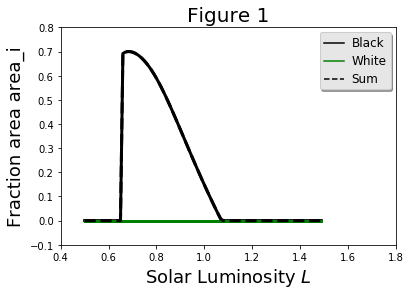

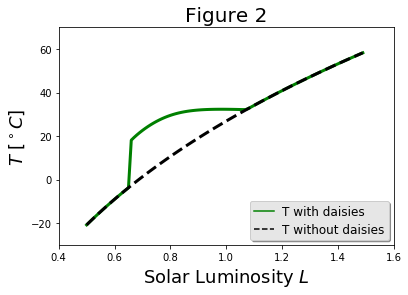

In [18]:
L = np.arange(.5,1.5,0.01)
model = Original_Daisyworld(area_w=0)
model.change_luminosity(L)
model.plot_model()